In [ ]:
!pip install -U shapely==1.8.5
!pip install geopandas
!pip install pyshp
!pip install plotly-geo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 26.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/2

In [ ]:
from google.colab import drive
import plotly, geopandas
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re

In [ ]:
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/MAP/data_folder'

Mounted at /content/drive


In [ ]:
accident_df = pd.read_csv(data_dir + ' /accident_cleaned.csv')
operation_df = pd.read_csv(data_dir + ' /new_operation_cleaned.csv') 

# Data Prepossing

In [ ]:
# remove old index for accident_df
accident_df.drop(columns=accident_df.columns[0], axis=1, inplace=True)

In [ ]:
# remove maintenance info since the project focuses on accidents
accident_df = accident_df.drop(accident_df.filter(regex='Maintenance').columns, axis=1)

In [ ]:
# remove duplicate columns in accident_df
accident_df = accident_df.T.drop_duplicates().T
accident_df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Day,Date,Time,Accident Type Code,...,Joint Track Class,Class Code,Joint CD,Incident Key,Report Key,Reporting Railroad Class,Reporting Railroad SMT Grouping,Reporting Parent Railroad Company Code,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company
0,CSX,CSX Transportation,2018.0,000174416,18.0,1.0,31.0,01/31/2018,8:45 AM,7.0,...,2,CL,1.0,CSX000174416201801,CSX000174416201801,Class 1,SMT-9 - CSX,CSX,CSX Transportation,CSX Transportation
1,CSX,CSX Transportation,2018.0,000173957,18.0,1.0,10.0,01/10/2018,9:00 PM,12.0,...,1,CL,1.0,CSX000173957201801,CSX000173957201801,Class 1,SMT-9 - CSX,CSX,CSX Transportation,CSX Transportation
2,CSX,CSX Transportation,2022.0,000205643,22.0,6.0,19.0,06/19/2022,4:15 AM,4.0,...,1,CL,3.0,CSX000205643202206,CSX000205643202206,Class 1,SMT-9 - CSX,CSX,CSX Transportation,CSX Transportation
3,NS,Norfolk Southern Railway Company,2022.0,145728,22.0,7.0,1.0,07/01/2022,10:55 PM,1.0,...,1,CL,1.0,NS145728202207,NS145728202207,Class 1,SMT-3 - Norfolk Southern,NS,Norfolk Southern Railway Company,Norfolk Southern Railway Company
4,CSX,CSX Transportation,2021.0,000201299,21.0,11.0,13.0,11/13/2021,7:31 AM,1.0,...,3,CL,1.0,CSX000201299202111,CSX000201299202111,Class 1,SMT-9 - CSX,CSX,CSX Transportation,CSX Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,UP,Union Pacific Railroad Company,2018.0,0418FW027,18.0,4.0,18.0,04/18/2018,1:31 AM,5.0,...,5,CL,3.0,UP0418FW027201804,UP0418FW027201804,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company
3491,UP,Union Pacific Railroad Company,2018.0,0418FW020,18.0,4.0,14.0,04/14/2018,2:42 PM,7.0,...,5,CL,1.0,UP0418FW020201804,UP0418FW020201804,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company
3492,UP,Union Pacific Railroad Company,2018.0,0418LK036,18.0,4.0,22.0,04/22/2018,11:00 AM,1.0,...,1,CL,1.0,UP0418LK036201804,UP0418LK036201804,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company
3493,UP,Union Pacific Railroad Company,2018.0,0418FW027,18.0,4.0,18.0,04/18/2018,1:31 AM,5.0,...,5,CL,1.0,UP0418FW027201804,UP0418FW027201804,Class 1,SMT-6 - UP/KCS,UP,Union Pacific Railroad Company,Union Pacific Railroad Company


In [ ]:
accident_df.hist(xlabelsize=0.5, ylabelsize=0.5)

ValueError: ignored

In [ ]:
# remove old index for operation_df
operation_df.drop(columns=operation_df.columns[0], axis=1, inplace=True)
operation_df

,Railroad Code,Railroad Name,Report Month,Report Year,State Code,State Name,County Code,County Name,Freight Train Miles,Passenger Train Miles,...,Motor Train Miles,Railroad Type,District,Railroad Grouping,Railroad SMT Grouping,Railroad Class,Parent Railroad Code,Parent Railroad Name,Railroad Holding Company,Report Key
0,DGNO,"Dallas, Garland & Northeastern Railroad",4,2020,12.0,FLORIDA,31.0,DUVAL,5088.0,0.0,...,0,Cl,3.0,Shortline,SMT-2 - Short Line East,Class 3,DGNO,"Dallas, Garland & Northeastern Railroad",Genesee & Wyoming,DGNO042020
1,GSWR,Georgia Southwestern Railroad Inc.,5,2018,12.0,FLORIDA,31.0,DUVAL,5824.0,0.0,...,0,Cl,3.0,Shortline,SMT-2 - Short Line East,Class 3,GSWR,Georgia Southwestern Railroad Inc.,Genesee & Wyoming,GSWR052018
2,SERX,Southern Electric Railroad,12,2018,1.0,ALABAMA,73.0,JEFFERSON,0.0,0.0,...,0,Cl,3.0,NaN,SMT-2 - Short Line East,Class 3,SERX,Southern Electric Railroad,Not Assigned,SERX122018
3,SERX,Southern Electric Railroad,11,2018,1.0,ALABAMA,73.0,JEFFERSON,0.0,0.0,...,0,Cl,3.0,NaN,SMT-2 - Short Line East,Class 3,SERX,Southern Electric Railroad,Not Assigned,SERX112018
4,SERX,Southern Electric Railroad,7,2018,1.0,ALABAMA,73.0,JEFFERSON,0.0,0.0,...,0,Cl,3.0,NaN,SMT-2 - Short Line East,Class 3,SERX,Southern Electric Railroad,Not Assigned,SERX072018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,GSWR,Georgia Southwestern Railroad Inc.,7,2021,12.0,FLORIDA,31.0,DUVAL,5528.0,0.0,...,0,Cl,3.0,Shortline,SMT-2 - Short Line East,Class 3,GSWR,Georgia Southwestern Railroad Inc.,Genesee & Wyoming,GSWR072021
5207,GVSR,"GALVESTON RWY, LP",7,2021,12.0,FLORIDA,31.0,DUVAL,0.0,0.0,...,0,Cl,3.0,Shortline,SMT-2 - Short Line East,Class 3,GVSR,"GALVESTON RWY, LP",Genesee & Wyoming,GVSR072021
5208,HAL,"Hilton & Albany Railroad, Inc.",7,2021,12.0,FLORIDA,31.0,DUVAL,2100.0,0.0,...,0,Cl,3.0,Shortline,SMT-2 - Short Line East,Class 3,HAL,"Hilton & Albany Railroad, Inc.",Genesee & Wyoming,HAL072021
5209,KRR,Kiamichi Railroad Company LLC,7,2021,12.0,FLORIDA,31.0,DUVAL,11160.0,0.0,...,0,Cl,3.0,Shortline,SMT-2 - Short Line East,Class 3,KRR,Kiamichi Railroad Company LLC,Genesee & Wyoming,KRR072021


# EDA (train accidents)

<Figure size 1200x700 with 0 Axes>

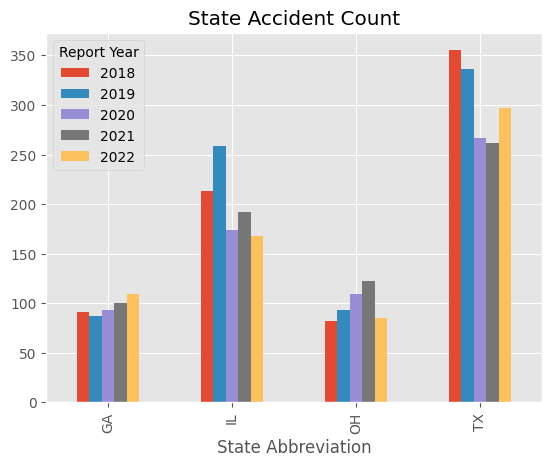

In [ ]:
# State accident counts by year
accident_df['Report Year'] = accident_df['Report Year'].astype(int) 
plt.figure(figsize=(12, 7))
accident_df.groupby('Report Year')['State Abbreviation'].value_counts().unstack(fill_value=0, level=0).plot(kind='bar')
plt.title("State Accident Count")
plt.show()

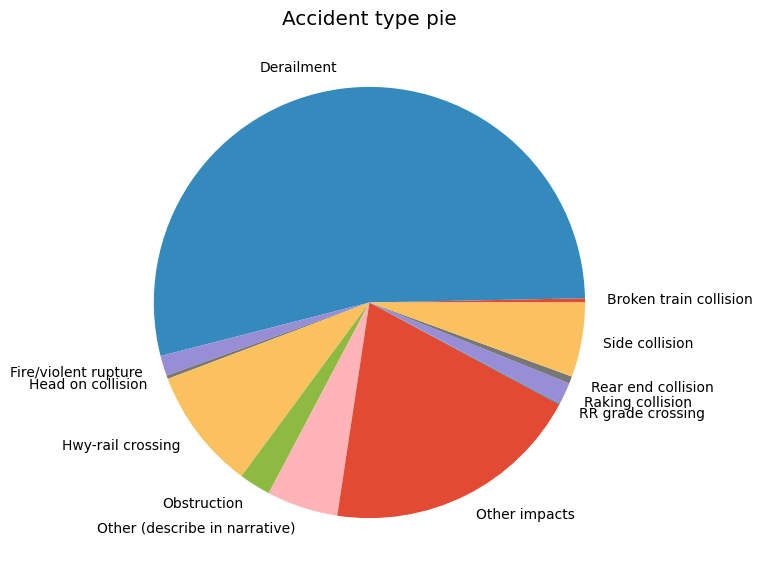

In [ ]:
# Accident Type
plt.figure(figsize=(12, 7))
accident_df.groupby('Accident Type').size().plot(kind='pie')
plt.title("Accident type pie")
plt.ylabel("")
plt.show()

In [ ]:
# Record accident counts by fips

# Convert state and county columns to string dtype and remove trailing zero
accident_df["State Code"] = accident_df["State Code"].astype(str).str.rstrip('0').str.rstrip('.')
accident_df["County Code"] = accident_df["County Code"].astype(str).str.rstrip('0').str.rstrip('.')

# Combine state and county columns to create new fips column with zero-padding
accident_df["FIPS"] = accident_df["State Code"].str.zfill(2) + accident_df["County Code"].str.zfill(3)
fips_count = accident_df["FIPS"].value_counts()

In [ ]:
fips = fips_count.index.tolist()
values = fips_count.tolist()

In [ ]:
# County accident map for each state
colorscale = [
    'rgb(255, 218, 185)',
    'rgb(255, 184, 140)',
    'rgb(240, 128, 128)',
    'rgb(255, 127, 80)',
    'rgb(205, 92, 92)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['GA', 'IL', 'OH', 'TX'],
    binning_endpoints=[10, 50, 100, 400], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Train Accidents Total by County', title='Train Accidents Total in Four States'
)
fig.layout.template = None
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_county_choropleth.py:359: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  x = [
/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_county_choropleth.py:363: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  y = [
/usr/local/lib/python3.9/dist-packages/plotly/figure_factory/_county_choropleth.py:368: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  x_c = [poly.centroid.xy[0].tolist() for poly in fips_polygon_map[f]]
/usr/local/lib/python3.9/dist-packages/plotly/figure_facto

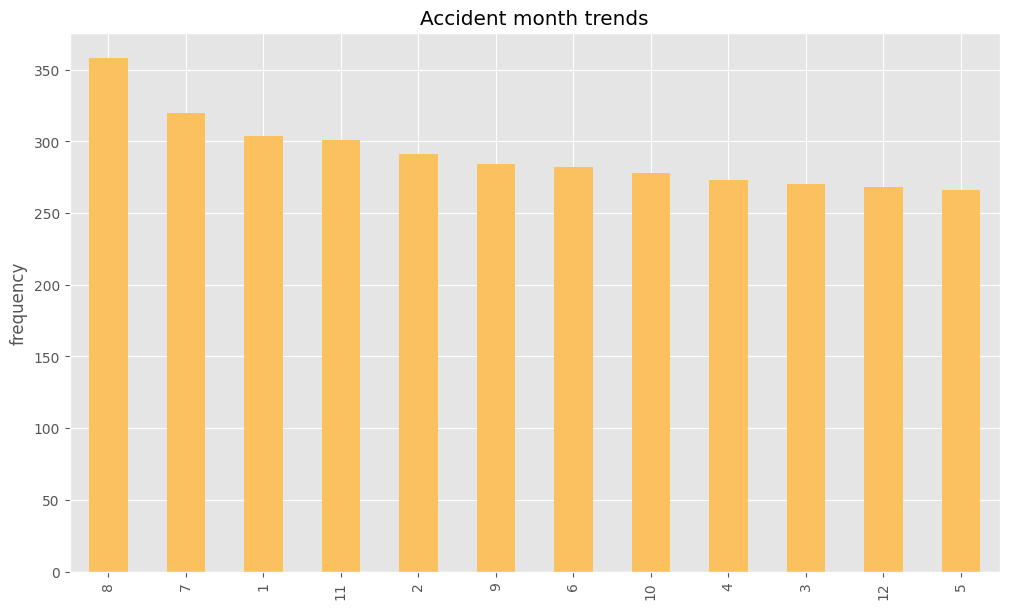

In [ ]:
# Accident month trends
accident_df['Accident Month'] = accident_df['Accident Month'].astype(int) 
plt.figure(figsize=(12, 7))
accident_df['Accident Month'].value_counts().plot(kind='bar', ylabel = 'frequency', color='#FBC15E')
plt.title("Accident month trends")
plt.show()

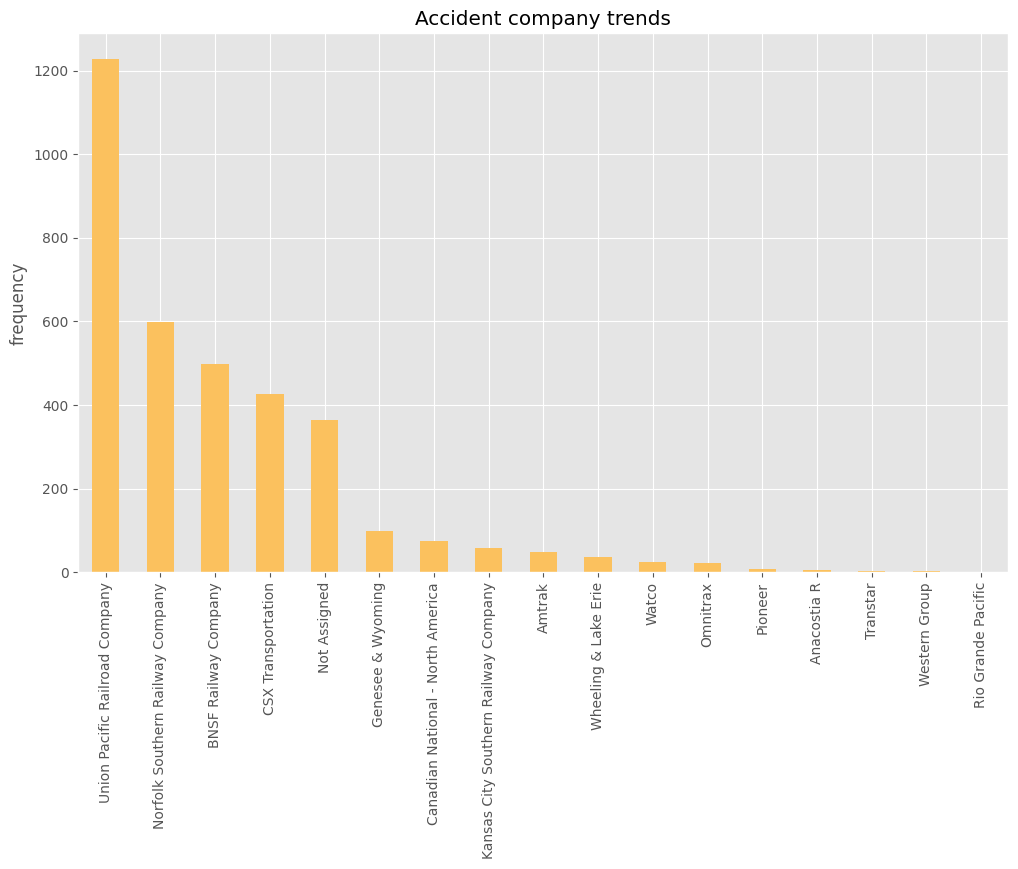

In [ ]:
# Accident company trends
plt.figure(figsize=(12, 7))
accident_df['Reporting Railroad Holding Company'].value_counts().plot(kind='bar', ylabel = 'frequency', color='#FBC15E')
plt.title("Accident company trends")
plt.show()

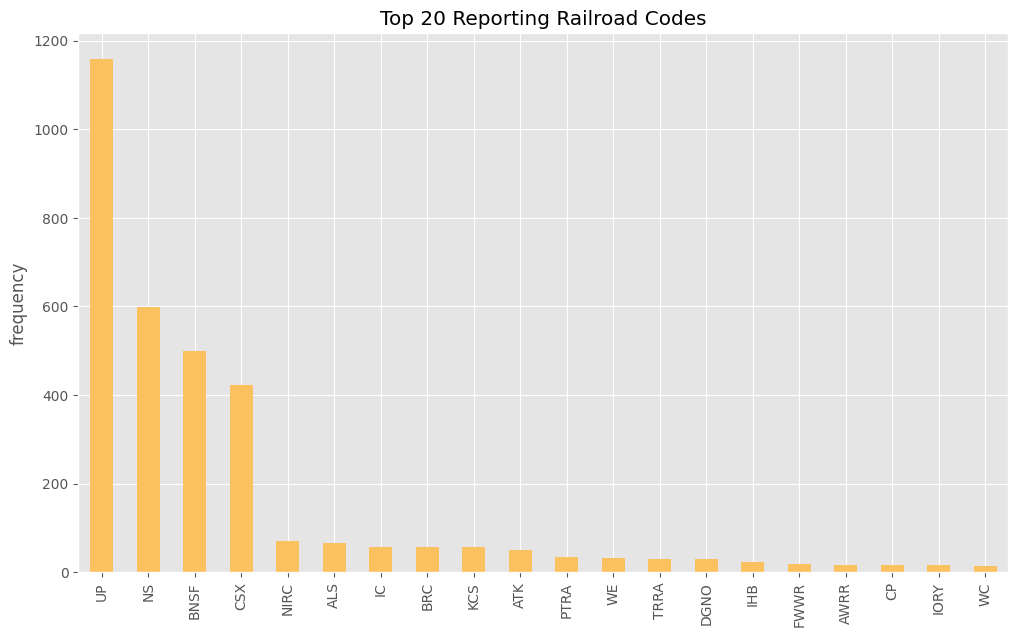

In [ ]:
# Accident railroad trends
plt.figure(figsize=(12, 7))
accident_df['Reporting Railroad Code'].value_counts().nlargest(20).plot(kind='bar', ylabel = 'frequency', color='#FBC15E')
plt.title("Top 20 Reporting Railroad Codes")
plt.show()

In [ ]:
# Railroad Operations for Railroads with Most Accidents
railroad_codes = ['UP', 'NS', 'BNSF', 'CSX']

# filter operation_df based on railroad_codes
operations_top4 = operation_df[operation_df['Railroad Code'].isin(railroad_codes)]
operations_top4['Railroad Code'] 

,Railroad Code,Railroad Name,Report Month,Report Year,State Code,State Name,County Code,County Name,Freight Train Miles,Passenger Train Miles,...,Motor Train Miles,Railroad Type,District,Railroad Grouping,Railroad SMT Grouping,Railroad Class,Parent Railroad Code,Parent Railroad Name,Railroad Holding Company,Report Key
13,CSX,CSX Transportation,6,2019,12.0,FLORIDA,31.0,DUVAL,5186684.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX062019
14,CSX,CSX Transportation,2,2019,12.0,FLORIDA,31.0,DUVAL,4859298.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX022019
15,CSX,CSX Transportation,8,2018,12.0,FLORIDA,31.0,DUVAL,5482079.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX082018
31,CSX,CSX Transportation,8,2020,12.0,FLORIDA,31.0,DUVAL,4400875.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX082020
35,CSX,CSX Transportation,10,2019,12.0,FLORIDA,31.0,DUVAL,5337481.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX102019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,CSX,CSX Transportation,8,2022,12.0,FLORIDA,31.0,DUVAL,4446888.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX082022
5160,CSX,CSX Transportation,5,2020,12.0,FLORIDA,31.0,DUVAL,3860888.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX052020
5161,CSX,CSX Transportation,7,2020,12.0,FLORIDA,31.0,DUVAL,4245613.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX072020
5189,CSX,CSX Transportation,1,2018,12.0,FLORIDA,31.0,DUVAL,5173545.0,0.0,...,0,CL,3.0,NaN,SMT-9 - CSX,Class 1,CSX,CSX Transportation,CSX Transportation,CSX012018


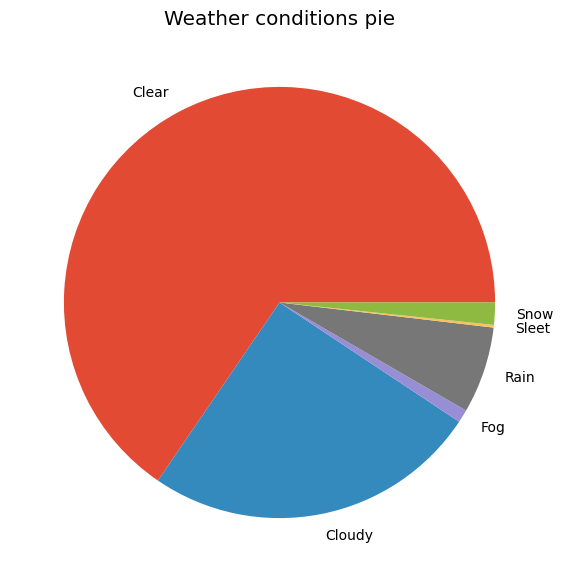

In [ ]:
# Accident weather
plt.figure(figsize=(12, 7))
accident_df.groupby('Weather Condition').size().plot(kind='pie')
plt.title("Weather conditions pie")
plt.ylabel("")
plt.show()

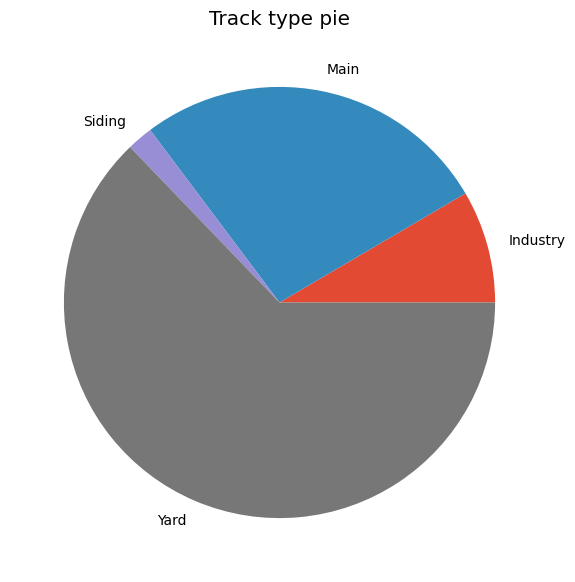

In [ ]:
# Track Type
plt.figure(figsize=(12, 7))
accident_df.groupby('Track Type').size().plot(kind='pie')
plt.title("Track type pie")
plt.ylabel("")
plt.show()